In [118]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [119]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

ImportError: No module named 'JSAnimation'

In [120]:
nx = 81
nt = 70
dx = 4.0/(nx-1)
u = numpy.ones(nx)
u[40:81] = 2

In [121]:
def u_initial(nx):
    u = numpy.ones(nx)
    u[40:81] = 0
    return u

u = u_initial(nx)

print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


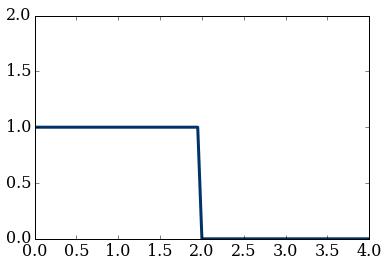

In [122]:
pyplot.plot(x, u, color='#003366', ls='-', lw=3)
pyplot.ylim(0,2);

In [123]:
computeF = lambda u: (u/2)**2

computeF (u)

array([ 0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,
        0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,
        0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,
        0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,  0.25,
        0.25,  0.25,  0.25,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [141]:
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for i in range(1,nt):
        F = computeF(u)
        
        ustar[:-1] = u[:-1] - dt/dx * (F[1:]-F[:-1]) 
        
        Fstar = computeF(ustar)
        
        un[i][1:] = 0.5 * (u[1:] + ustar[1:]-(dt/dx)*(Fstar[1:]-Fstar[:-1]))
        
        u = un[i].copy()
        
    return un

In [142]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line

In [143]:
u = u_initial(nx)
sigma = 1
dt = sigma*dx

un = maccormack(u,nt,dt,dx)